In [1]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.model_selection import  train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

C:\Users\Bjorn\anaconda3\envs\new_tf\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Bjorn\anaconda3\envs\new_tf\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
K = np.random.randint(1,15)

In [3]:
# generate synthetic two-dimensional data 
X, y = make_blobs(n_samples = 1000, centers=K, random_state=1) # build the clustering model 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

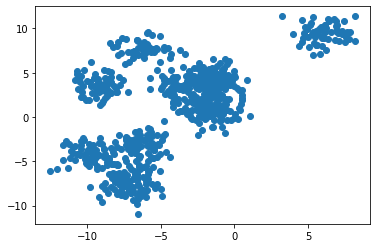

In [5]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

In [6]:
from sklearn.cluster import KMeans
elbow = [] 
for i in range(2, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    elbow.append(kmeans.inertia_)

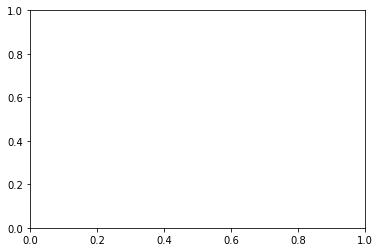

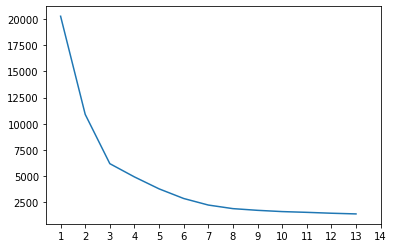

In [7]:
plt.gca()
plt.figure()
plt.plot(elbow)
plt.xticks(np.arange(0,14),np.arange(1,15))
plt.show()

In [8]:
kmeans = KMeans(n_clusters=7, init='k-means++')
kmeans.fit(X_train)

KMeans(n_clusters=7)

In [10]:
y_train_hat = kmeans.predict(X_train)

In [11]:
df_concat = pd.DataFrame(np.hstack([X_train,np.expand_dims(y_train_hat,axis=1)]), columns=["x","y","class"])

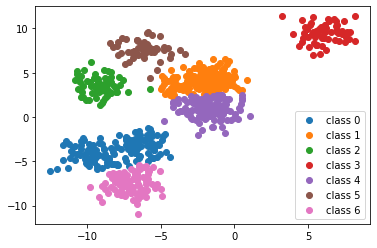

In [12]:
plt.figure()
for i in sorted(df_concat["class"].unique().astype(int)):
    plt.scatter(x=df_concat[df_concat["class"]==i].iloc[:,0], y=df_concat[df_concat["class"]==i].iloc[:,1], color="C{}".format(i), label="class {}".format(i))
plt.legend()

<IPython.core.display.Javascript object>


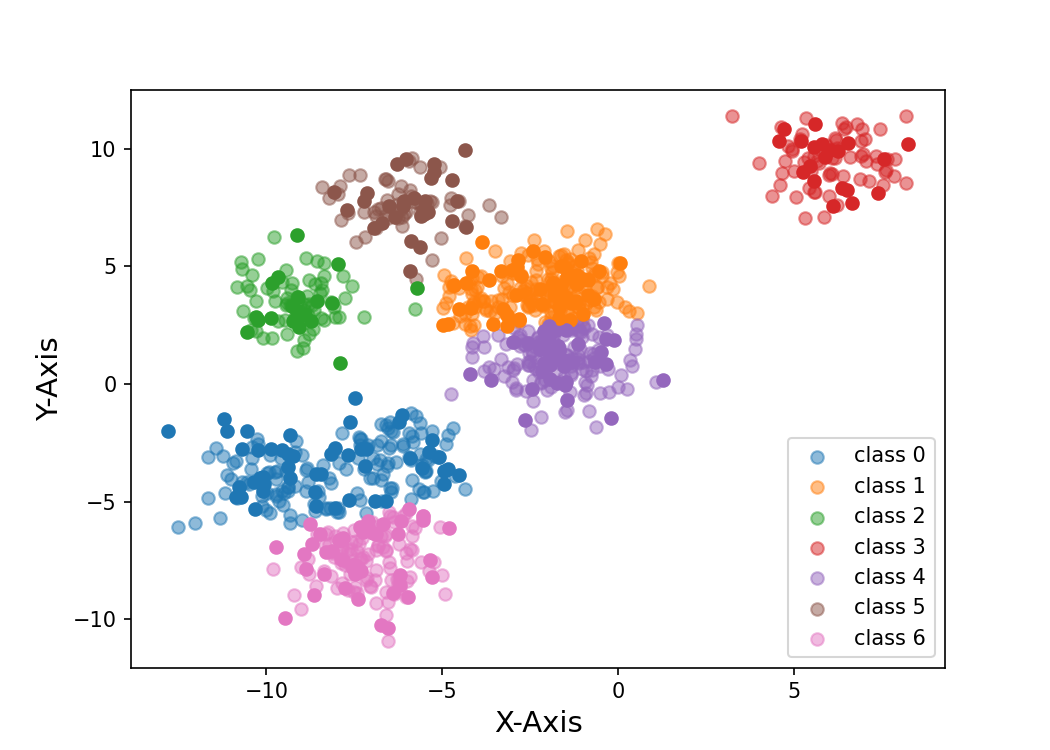

In [13]:
%matplotlib notebook

figure, ax = plt.subplots(figsize=(7,5))
plt.ion()


for i in sorted(df_concat["class"].unique().astype(int)):
    ax.scatter(x=df_concat[df_concat["class"]==i].iloc[:,0], y=df_concat[df_concat["class"]==i].iloc[:,1], color="C{}".format(i), label="class {}".format(i), alpha=0.5)


plt.xlabel("X-Axis",fontsize=14)
plt.ylabel("Y-Axis",fontsize=14)
plt.legend()

for j in X_test:

    plt.scatter(x=j[0],y=j[1], color="C{}".format(kmeans.predict(np.expand_dims(j,0))[0]))
    figure.canvas.draw()
    figure.canvas.flush_events()
    #time.sleep(0.1)
    